# BUSINESS UNDERSTANDING 
Microsoft sees the success of major companies in developing original video content.Based on this observation microsoft is eager to join the league by establishing a new movie studio.Unfortunately, they are unfamiliar with film creation.This project will be investigating the current top_performing film genres at the box office.The aim is to convert this findings into actionable insights ,that can be used to guide the head of microsoft's new movie studio to make decisions on the best types of films to produce.

# Data understanding
This data was collected from bomgrossmovie.

In [1]:
# import libraries needed for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import Data, we will use read_csv to import the data

In [144]:
data = pd.read_csv("./data/bom.movie_gross.csv")

Inspect the data 

In [145]:
data.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [146]:
data.tail()

title      studio  domestic_gross foreign_gross  \
3382                    The Quake       Magn.          6200.0           NaN   
3383  Edward II (2018 re-release)          FM          4800.0           NaN   
3384                     El Pacto        Sony          2500.0           NaN   
3385                     The Swan  Synergetic          2400.0           NaN   
3386            An Actor Prepares       Grav.          1700.0           NaN   

      year  
3382  2018  
3383  2018  
3384  2018  
3385  2018  
3386  2018

In [147]:
#convert domestic_gross and foreign_gross to numeric
data['domestic_gross'] = pd.to_numeric(data['domestic_gross'], errors='coerce')
data['foreign_gross'] = pd.to_numeric(data['foreign_gross'], errors='coerce')

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


# Descriptive statistics for the data

In [149]:
data.describe()

domestic_gross  foreign_gross         year
count    3.359000e+03   2.032000e+03  3387.000000
mean     2.874585e+07   7.505704e+07  2013.958075
std      6.698250e+07   1.375294e+08     2.478141
min      1.000000e+02   6.000000e+02  2010.000000
25%      1.200000e+05   3.775000e+06  2012.000000
50%      1.400000e+06   1.890000e+07  2014.000000
75%      2.790000e+07   7.505000e+07  2016.000000
max      9.367000e+08   9.605000e+08  2018.000000

In [150]:
data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

## From the data: 

- ##### We can see that there are 3387 rows and 5 columns
- ##### There are 3 columns with null values
- ##### The columns with null values are: domestic_gross, foreign_gross, and year
- ##### The column with the most null values is foreign_gross with 2007 null values


## Data Cleaning 
<hr/> 

In [151]:
data['studio'].value_counts()

studio
IFC           166
Uni.          147
WB            140
Fox           136
Magn.         136
             ... 
E1              1
PI              1
ELS             1
PalT            1
Synergetic      1
Name: count, Length: 257, dtype: int64

In [152]:
data['domestic_gross'].value_counts()

domestic_gross
1100000.0      32
1000000.0      30
1300000.0      30
1200000.0      25
1400000.0      23
               ..
125200000.0     1
134500000.0     1
56700000.0      1
58200000.0      1
2400.0          1
Name: count, Length: 1797, dtype: int64

In [153]:
data['foreign_gross'].value_counts()

foreign_gross
1200000.0      23
1100000.0      14
1900000.0      12
4200000.0      12
2500000.0      11
               ..
96300000.0      1
138300000.0     1
63100000.0      1
118100000.0     1
30000.0         1
Name: count, Length: 1199, dtype: int64

In [154]:
data['year'].value_counts()

year
2015    450
2016    436
2012    400
2011    399
2014    395
2013    350
2010    328
2017    321
2018    308
Name: count, dtype: int64

<Axes: xlabel='year'>

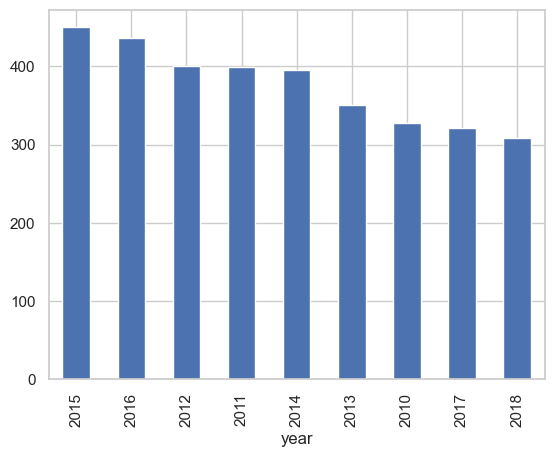

In [155]:
data['year'].value_counts().plot(kind='bar')

<Axes: xlabel='year'>

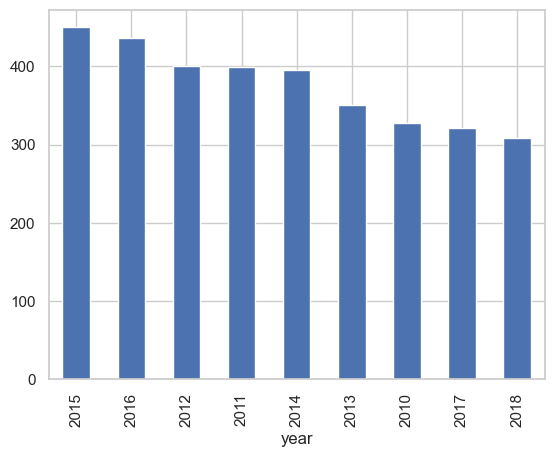

In [156]:
data['year'].value_counts().plot(kind='bar')

In [157]:
# fill NA with mean of the column  for the domestic_gross  and foreign_gross columns

data['domestic_gross'].fillna(data['domestic_gross'].mean(), inplace=True)


In [158]:
#check to see if the null values were filled
data.isnull().sum()

title                0
studio               5
domestic_gross       0
foreign_gross     1355
year                 0
dtype: int64

In [159]:
#check columns 
data.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [160]:
#find the most sold movie title based on domestic_gross and foreign_gross
data.loc[data['domestic_gross'].idxmax()]


title             Star Wars: The Force Awakens
studio                                      BV
domestic_gross                     936700000.0
foreign_gross                              NaN
year                                      2015
Name: 1872, dtype: object

# Top 5 most sold movies based on domestic_gross 

In [161]:
#top 5 most sold movies based on domestic_gross 
data.sort_values(by=['domestic_gross'], ascending=False).head(5)


title studio  domestic_gross  foreign_gross  year
1872  Star Wars: The Force Awakens     BV     936700000.0            NaN  2015
3080                 Black Panther     BV     700100000.0    646900000.0  2018
3079        Avengers: Infinity War     BV     678800000.0            NaN  2018
1873                Jurassic World   Uni.     652300000.0            NaN  2015
727          Marvel's The Avengers     BV     623400000.0    895500000.0  2012

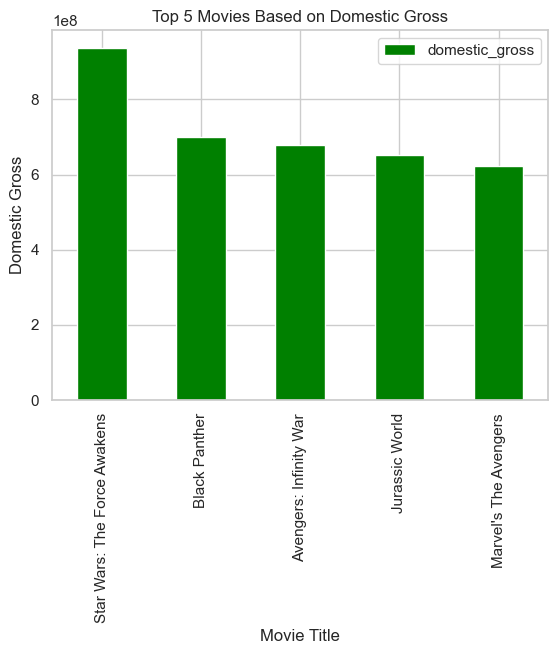

In [162]:
#Top 5 most sold movies based on domestic_gross line graph add labels and title and point values slank x and y axis¶
data.sort_values(by=['domestic_gross'], ascending=False).head(5).plot(kind='bar', x='title', y='domestic_gross', color='green')
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross')
plt.title('Top 5 Movies Based on Domestic Gross')
plt.show()


# Top five most sold movies based on foreign-gross

In [164]:
#top 5 most sold movies based on foreign_gross
data.sort_values(by=['foreign_gross'], ascending=False).head(5)

title studio  domestic_gross  \
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
1875                      Avengers: Age of Ultron     BV     459000000.0   
727                         Marvel's The Avengers     BV     623400000.0   
3081               Jurassic World: Fallen Kingdom   Uni.     417700000.0   
1127                                       Frozen     BV     400700000.0   

      foreign_gross  year  
328     960500000.0  2011  
1875    946400000.0  2015  
727     895500000.0  2012  
3081    891800000.0  2018  
1127    875700000.0  2013

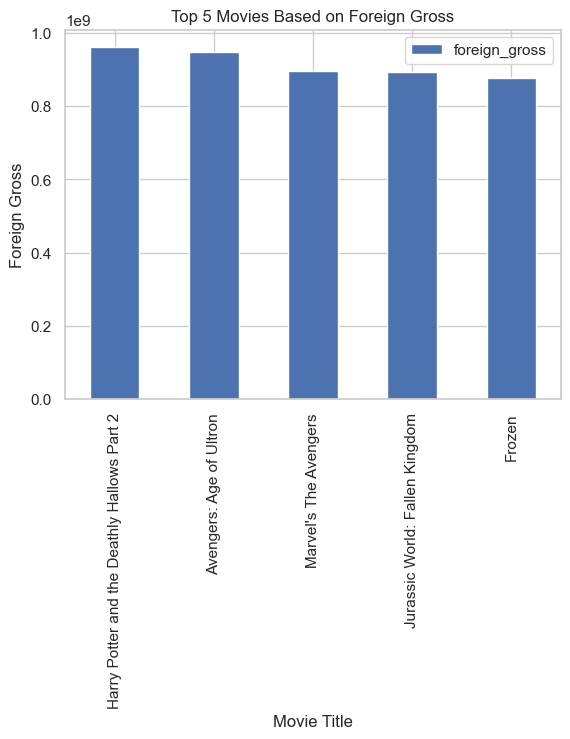

In [165]:
#plot the top 5 most sold movies based on foreign_gross line graph add labels and title and point values
data.sort_values(by=['foreign_gross'], ascending=False).head(5).plot(kind='bar', x='title', y='foreign_gross')
plt.xlabel('Movie Title')
plt.ylabel('Foreign Gross')
plt.title('Top 5 Movies Based on Foreign Gross')
plt.show()

# The most sold movie title based on year

In [166]:
#find the most sold movie title based on year
data.loc[data['year'].idxmax()]

title             Avengers: Infinity War
studio                                BV
domestic_gross               678800000.0
foreign_gross                        NaN
year                                2018
Name: 3079, dtype: object

# Top five most sold movies based on year 

In [167]:
#top 5 most sold movies based on year
data.sort_values(by=['year'], ascending=False).head(5)


title studio  domestic_gross  foreign_gross  \
3386               An Actor Prepares  Grav.          1700.0            NaN   
3183             On the Basis of Sex  Focus      24600000.0     13600000.0   
3176          Tyler Perry's Acrimony    LGF      43500000.0      2900000.0   
3177             Mary Queen of Scots  Focus      16500000.0     29900000.0   
3178  The Possession of Hannah Grace   SGem      14800000.0     28200000.0   

      year  
3386  2018  
3183  2018  
3176  2018  
3177  2018  
3178  2018

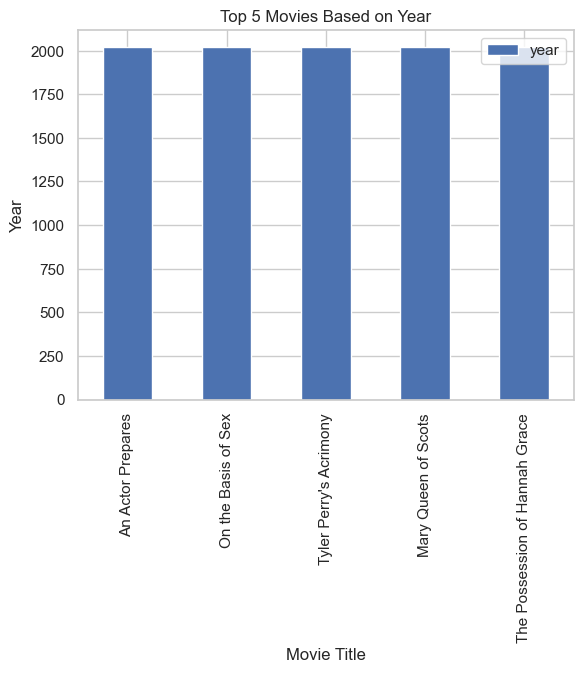

In [168]:
#plot the top 5 most sold movies based on year line graph add labels and title and point values
data.sort_values(by=['year'], ascending=False).head(5).plot(kind='bar', x='title', y='year')
plt.xlabel('Movie Title')
plt.ylabel('Year')
plt.title('Top 5 Movies Based on Year')
plt.show()

In [169]:
#create column of total gross by adding domestic_gross and foreign_gross
data['total_gross'] = data['domestic_gross'] + data['foreign_gross']


In [170]:
data.head()

title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

   foreign_gross  year   total_gross  
0    652000000.0  2010  1.067000e+09  
1    691300000.0  2010  1.025500e+09  
2    664300000.0  2010  9.603000e+08  
3    535700000.0  2010  8.283000e+08  
4    513900000.0  2010  7.526000e+08

# The most sold movie title based on total_gross

In [171]:
#find the most sold movie title based on total_gross
data.loc[data['total_gross'].idxmax()]

title             Marvel's The Avengers
studio                               BV
domestic_gross              623400000.0
foreign_gross               895500000.0
year                               2012
total_gross                1518900000.0
Name: 727, dtype: object

# Top five most sold movies based on total gross

In [172]:
#top 5 most sold movies based on total_gross
data.sort_values(by=['total_gross'], ascending=False).head(5)

title studio  domestic_gross  \
727                         Marvel's The Avengers     BV     623400000.0   
1875                      Avengers: Age of Ultron     BV     459000000.0   
3080                                Black Panther     BV     700100000.0   
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
2758                     Star Wars: The Last Jedi     BV     620200000.0   

      foreign_gross  year   total_gross  
727     895500000.0  2012  1.518900e+09  
1875    946400000.0  2015  1.405400e+09  
3080    646900000.0  2018  1.347000e+09  
328     960500000.0  2011  1.341500e+09  
2758    712400000.0  2017  1.332600e+09

# Last five most sold movies based on total_gross

In [178]:
#last 5 most sold movies based on total_gross
data.sort_values(by=['total_gross'], ascending=False).tail(5)

title      studio  domestic_gross  foreign_gross  \
3382                    The Quake       Magn.          6200.0            NaN   
3383  Edward II (2018 re-release)          FM          4800.0            NaN   
3384                     El Pacto        Sony          2500.0            NaN   
3385                     The Swan  Synergetic          2400.0            NaN   
3386            An Actor Prepares       Grav.          1700.0            NaN   

      year  total_gross  
3382  2018          NaN  
3383  2018          NaN  
3384  2018          NaN  
3385  2018          NaN  
3386  2018          NaN

#plot the top 5 most sold movies based on total_gross line graph add labels and title and point values
data.sort_values(by=['total_gross'], ascending=False).head(5).plot(kind='bar', x='title', y='total_gross')
plt.xlabel('Movie Title')
plt.ylabel('Total Gross')
plt.title('Top 5 Movies Based on Total Gross')
plt.show()


# Best year based on total_gross and year

In [174]:
#find the best year based on total_gross and year 

data.loc[data['total_gross'].idxmax()]


title             Marvel's The Avengers
studio                               BV
domestic_gross              623400000.0
foreign_gross               895500000.0
year                               2012
total_gross                1518900000.0
Name: 727, dtype: object

In [175]:
# sort the data total_gross in descending order and output the top 5 years
data.sort_values(by=['total_gross'], ascending=False).head(5)


title studio  domestic_gross  \
727                         Marvel's The Avengers     BV     623400000.0   
1875                      Avengers: Age of Ultron     BV     459000000.0   
3080                                Black Panther     BV     700100000.0   
328   Harry Potter and the Deathly Hallows Part 2     WB     381000000.0   
2758                     Star Wars: The Last Jedi     BV     620200000.0   

      foreign_gross  year   total_gross  
727     895500000.0  2012  1.518900e+09  
1875    946400000.0  2015  1.405400e+09  
3080    646900000.0  2018  1.347000e+09  
328     960500000.0  2011  1.341500e+09  
2758    712400000.0  2017  1.332600e+09

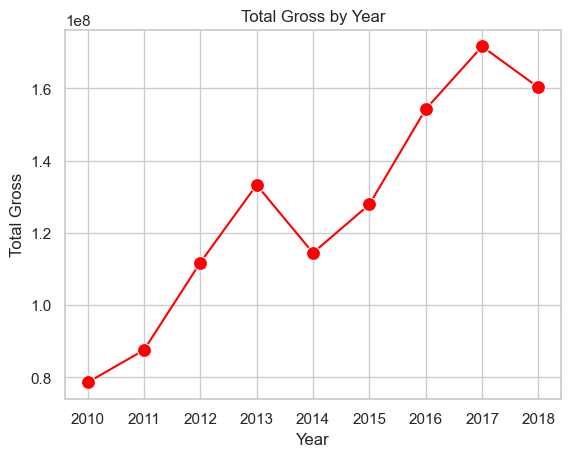

In [176]:
#plot line graph with point values of unique years and total_gross using seaborn add total gross values in the line plot 

sns.lineplot(x='year', y='total_gross', data=data, color='red', marker='o', ci=None, markersize=10)
plt.xlabel('Year')
plt.ylabel('Total Gross')
plt.title('Total Gross by Year')
plt.show()



In [177]:
#count unique years in the data and unique studios output in same output 

print( " Unique years Count")
print(data['year'].nunique())

print( " Unique studios Count")
print(data['studio'].nunique())


 Unique years Count
9
 Unique studios Count
257


# Recommendations for the business 
1.Partner with High_level Studios like 'BV'. Based on the analysis ,'Bv' studio is the choice for movies business because as it's likely to get foreign and domestic viewership.

2.Focusing on movies with foreign gross has value and also movies a bit old in the market.
movies with a substantial foreign gross indicate a broad international appeal. It allows the studio to tap into diverse markets and maximize revenue potential.The studio can also establish a strong global presence and generate income streams beyond domestic markets.On the other hand,movies that have stayed in the market for quite sometime have gained popularity. They have demonstrated their staying power and continued audience interest over an extended period.

3."Marvel's The Avengers" had the highest Gross sales.It is the movie to go for.It stands out as the top performer in terms of gross sales, making it the optimal choice for consideration. This is based on the film's undeniable success and widespread appeal.The film's success is indicative of its captivating storyline, compelling characters, and effective marketing strategies. 

4.Most recent movies without foreign gross sales,especially the ones from Grav and specifically "An actor Prepares "performed the worst,so it isn't a good idear to stock it. 
